In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
data= np.loadtxt('/content/drive/MyDrive/Code/Data.txt')

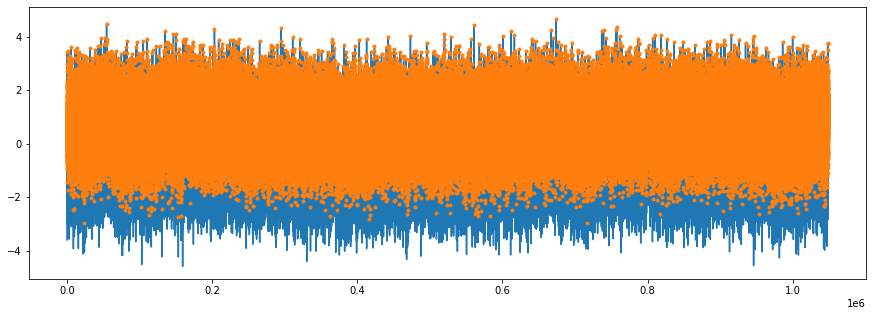

In [2]:
peaks=[]
for i in range(1,len(data)-1):
  if data[i]>data[i-1] and data[i]>data[i+1]:
    peaks.append(i) 
plt.figure(figsize=(15,5))
plt.plot(data)
plt.plot(peaks, data[peaks], '.');

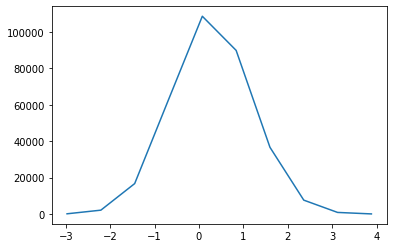

In [3]:
pdf, x_=np.histogram(data[peaks])
plt.plot(x_[:-1],pdf);

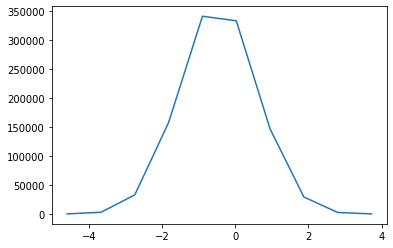

In [4]:
pdf, x_=np.histogram(data)
plt.plot(x_[:-1],pdf);

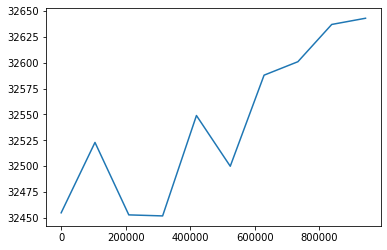

In [5]:
pdf,x_ =np.histogram(peaks)
#plt.ylim(0,50)
plt.plot(x_[:-1],pdf);

In [23]:
a = np.array([1,2,4,3,5,2])
b = np.roll(a,1)
c = np.roll(a,-1)
print(a)
print(b)
print(c)

[1 2 4 3 5 2]
[2 1 2 4 3 5]
[2 4 3 5 2 1]


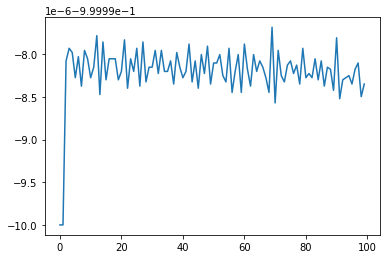

In [24]:
from sys import prefix
data = np.loadtxt('/content/1d_data.txt')
M =100
Max = data.max() ;Min = data.min()
dx = (Max-Min)/(M-1)
n_p=0
location_n_p =[]
value_n_p =[]
for i in range(1, len(data)-1):
    k1 = int((data[i]-data[i+1])/dx)
    k2 = int((data[i]-data[i-1])/dx) 
    if k1>0 and k2>0:
      n_p += 1
      location_n_p.append(i)
      value_n_p.append(data[i])

DD = np.zeros(len(data))
for i in range(n_p-1):
    for j in range(i+1, n_p):
        tau =abs(location_n_p[i]-location_n_p[j])
        DD[tau] += 1

psi =[]
N =len(data)
for tau in range(100):
  psi.append((DD[tau]/(n_p*(n_p-1)/2*N))-1)
plt.plot(psi);

In [25]:
data =np.loadtxt('/content/1d_data.txt')
M =100
max = data.max(); Min = data.min()
dx =(max-Min)/(M-1)
n_p =0
location_n_p =[]
value_n_p =[]
for i in range(1, len (data)-1):
    k1 =int(((data[i])-data[i+1])/dx)
    k2 =int(((data[i])-data[i-1])/dx)
    if k1>0 and k2>0:
      n_p += 1
      location_n_p.append(i)
      value_n_p.append(data[i])

In [26]:
DD =np.zeros(len(data))   
for i in range(n_p-1):
    for j in range(i+1,n_p):
      tau =abs(location_n_p[i]-location_n_p[j])
      DD[tau]+= 1
DD/= (n_p*(n_p-1)/2)
random_location_n_p =[]
ratio= 1
new_data =list(range(ratio*len(data)))
for i in range(ratio*n_p-1):
    rand =np.random.randint(1,len(new_data)-1)
    random_location_n_p.append(rand)
    try:del new_data[rand+1], new_data[rand],new_data[rand-1]
    except:break

In [27]:
n_r =len(random_location_n_p)
RR =np.zeros(len(data))
for i in range(n_r-1):
    for j in range(i+1,n_r):
       tau =abs(random_location_n_p[i]-random_location_n_p[j])
       RR[tau] += 1
RR /=(n_r*(n_r-1)/2)

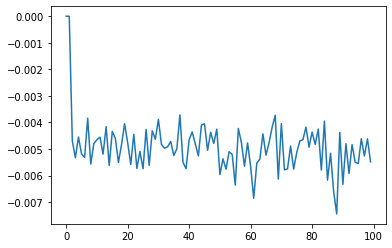

In [30]:
psi =[]
N =len(data)
for tau in range(100):
    psi.append(DD[tau]/RR[tau]*(n_r*(n_r-1)/(n_p*(n_p-1))-1))
plt.plot(psi);

In [31]:
_2 = np.loadtxt('/content/0.2.txt')
_5 = np.loadtxt('/content/0.5.txt')
_8 = np.loadtxt('/content/0.8.txt')

In [32]:
def pdf(x,y,bins):
  Min =np.min((x,y))
  Max =np.max((x,y))
  dx = dy =(Max-Min)/(bins-1)
  px = np.zeros(bins)
  py = np.zeros(bins)
  pxy =np.zeros((bins,bins)) 
  for i in range(len(x)):
      k1 = int((x[i]-Min)/dx)
      k2 =int((y[i]-Min)/dy)
      px[k2] +=1
      py[k1] +=1
  px /=(np.sum(px)*dx)
  py /=(np.sum(py)*dy)
  pxy /=(np.sum(pxy)*dx*dy)
  return px,py,pxy

In [45]:
def Ixy(x, y, bins = 100):
  Min =np.min((x,y))
  Max =np.max((x,y))
  dx = dy =(Max-Min)/(bins-1)
  px = np.zeros(bins)
  py = np.zeros(bins)
  pxy =np.zeros((bins,bins)) 
  for i in range(len(x)):
      k1 = int((x[i]-Min)/dx)
      k2 =int((y[i]-Min)/dy)
      px[k2] +=1
      py[k1] +=1
  px /=(np.sum(px)*dx)
  py /=(np.sum(py)*dy)
  pxy /=(np.sum(pxy)*dx*dy)

  xy = 0
  for i in range(len(pxy)):
    for j in range(len(pxy)):
      if pxy[i][j]!=0 and px[j]!=0 and py[i]!=0: xy += pxy[i][j]*np.log(pxy[i][j]/px[j]*py[i])

  return xy



In [48]:
print(Ixy(_2, _5))

nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


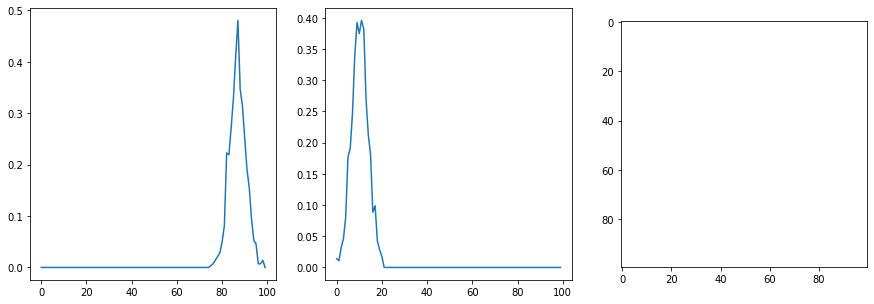

In [51]:
bins =100
px,py,pxy =pdf(_2,_5,bins)
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(px);
ax[1].plot(py);
ax[2].imshow(pxy);